In [119]:
import numpy as np
from datetime import datetime
import time 
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from jupyterthemes import jtplot
jtplot.style()

# Data vizualisation and processing

## Data loading

In [120]:
data = np.load("X_train_surge.npz")

id_sequence = data["id_sequence"] #the ids of the sequence
t_slp = data["t_slp"]  #the 40 GMT times at which the sea-level pressure (SLP) fields are given.
slp = data["slp"] #the 40 sea-level pressure (SLP) fields, encoded in images of size (41, 41).
t_surge1_input = data["t_surge1_input"] #the 10 GMT times at which the surge heights are given in city 1.
surge1_input= data["surge1_input"] #the given surge heights in city 1.
t_surge2_input = data["t_surge2_input"] #the 10 GMT times at which the surge heights are given in city 2.
surge2_input = data["surge2_input"] #the given surge heights in city 2.
t_surge1_output = data["t_surge1_output"] #the 10 GMT times at which we must predict surge heights in city 1.
t_surge2_output = data["t_surge2_output"] #the 10 GMT times at which we must predict surge heights in city 2. 

## Some sample of SLP

[ 0 20  9 28]


<Figure size 460.8x403.2 with 0 Axes>

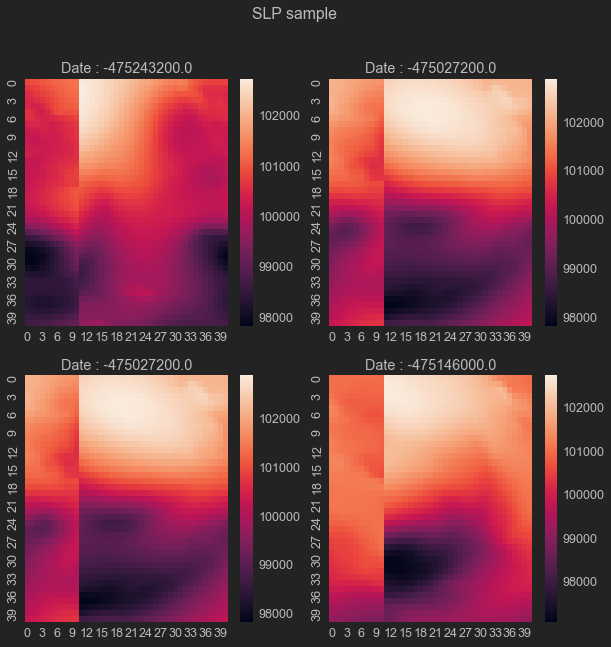

In [126]:
plt.figure()
line = 555
random_inds = np.random.choice(slp.shape[1],4)
print(random_inds)
fig, axes = plt.subplots(2,2,figsize = (10,10))
fig.suptitle('SLP sample')
for i in range(2):
    for j in range(2):
        image_ind = random_inds[i+j]
        date = str(t_slp[line,image_ind])
        sns.heatmap(ax = axes[i,j], data = slp[line,image_ind,:,:]).set(title='Date : '+ date)

## Some sample of surge

[ 134 1112 4459 2853]


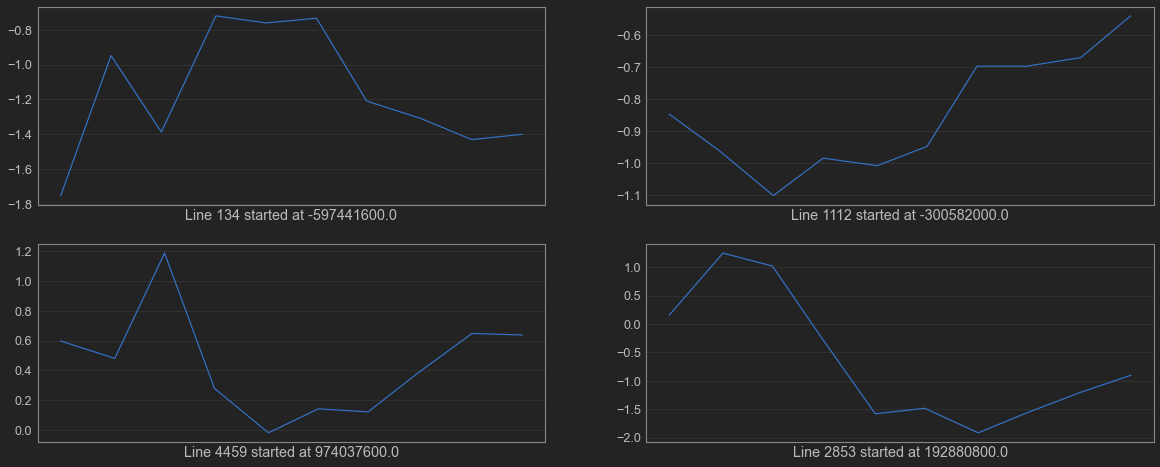

In [125]:
plt.figure(figsize=(20,8))
random_inds = np.random.choice(surge1_input.shape[0],4)
print(random_inds)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    image_ind = random_inds[i]
    plt.plot(t_surge1_input[image_ind,:],surge1_input[image_ind,:])
    plt.xlabel('Line '+ str(image_ind)+ ' started at '+ str(t_surge1_input[image_ind,0]))

Given sea level pressure fields (every 3h during 5 days) and the surge ( 2 times per day during 5 days) , we should forecast surge of the next five days. 